In [1]:
# 1. تحميل وتحليل ومعالجة البيانات
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
# تحميل البيانات
file_path = r"C:\Users\user\Desktop\Intelligent Programming\Project 1\heart (1).csv"
df = pd.read_csv(file_path)


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1.0,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0.0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0.0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0.0,159,0,0.0,2,0,2,1


In [4]:
# عرض ملخص إحصائي للبيانات
print("Summary Statistics:\n", df.describe())


Summary Statistics:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1024.000000  1025.000000  1025.000000  1023.000000   
mean      0.149268     0.529297   149.114146     0.336585     1.072043   
std       0.356527     0.527931    23.005724     0.472772     1.176008   
min       0.000000     0.

In [5]:
# التحقق من القيم المفقودة ومعالجتها
print("Missing Values:\n", df.isnull().sum())
df.fillna(df.mean(), inplace=True)


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# تطبيع البيانات العددية
scaler = MinMaxScaler()
numerical_columns = ['age', 'chol', 'trestbps']  # التأكد من صحة أسماء الأعمدة
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [7]:
# طباعة أسماء الأعمدة للتحقق منها
print("Dataset Columns:", df.columns)


Dataset Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [8]:
# التحقق من وجود الأعمدة الفئوية المطلوبة قبل الترميز
available_categorical_columns = [col for col in ['sex', 'exang', 'fbs'] if col in df.columns]
print("Available categorical columns for encoding:", available_categorical_columns)

if available_categorical_columns:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_data = encoder.fit_transform(df[available_categorical_columns])
    df = df.drop(columns=available_categorical_columns)
    df = pd.concat([df, pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(available_categorical_columns))], axis=1)
else:
    print("Warning: No categorical columns found for encoding!")


Available categorical columns for encoding: ['sex', 'exang', 'fbs']


In [9]:
# حفظ البيانات المعالجة
processed_data_path = "cleaned_data.csv"
df.to_csv(processed_data_path, index=False)
print(f"Processed data saved to {processed_data_path}")


Processed data saved to cleaned_data.csv


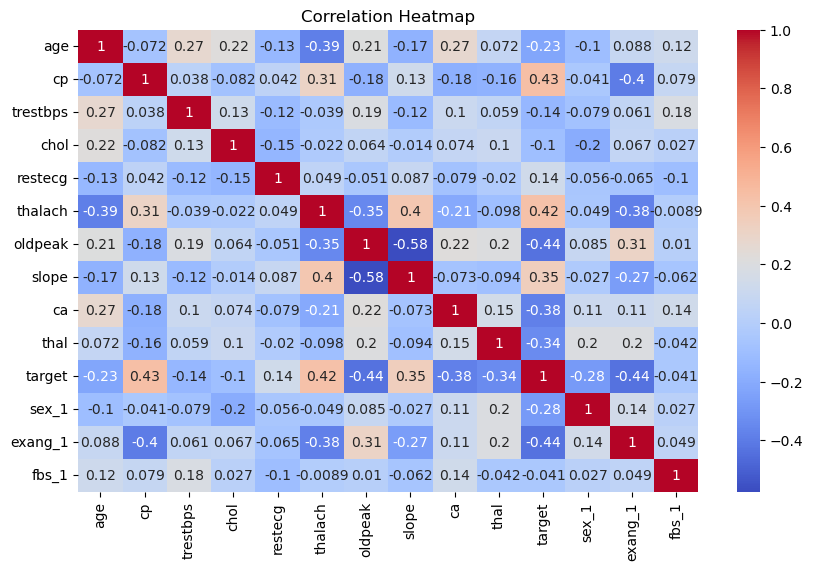

In [10]:
# عرض المخططات البيانية
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# 2. بناء نظام الخبراء باستخدام Experta
import collections.abc
from experta import *

class HeartDiseaseRisk(KnowledgeEngine):
    @Rule(Fact(chol=P(lambda x: x > 240)), Fact(age=P(lambda x: x > 50)))
    def high_risk_1(self):
        print("Risk: High - High Cholesterol and Age > 50")
    
    @Rule(Fact(trestbps=P(lambda x: x > 140)), Fact(exang=True))
    def high_risk_2(self):
        print("Risk: High - High Blood Pressure and Exercise Induced Angina")
    
    @Rule(Fact(fbs=True), Fact(age=P(lambda x: x < 40)))
    def low_risk(self):
        print("Risk: Low - Low Age and Normal Fasting Blood Sugar")
    
    @Rule(Fact(age=P(lambda x: x > 60)), Fact(chol=P(lambda x: x > 200)))
    def high_risk_3(self):
        print("Risk: High - Age > 60 and High Cholesterol")
    
    @Rule(Fact(sex=1), Fact(age=P(lambda x: x > 45)))
    def moderate_risk_1(self):
        print("Risk: Moderate - Male over 45")

    @Rule(Fact(sex=0), Fact(age=P(lambda x: x > 55)))
    def moderate_risk_2(self):
        print("Risk: Moderate - Female over 55")
    
    @Rule(Fact(chol=P(lambda x: x < 200)), Fact(trestbps=P(lambda x: x < 120)))
    def low_risk_2(self):
        print("Risk: Low - Normal Cholesterol and Blood Pressure")
    
    @Rule(Fact(exang=True), Fact(trestbps=P(lambda x: x > 130)))
    def moderate_risk_3(self):
        print("Risk: Moderate - Exercise Induced Angina and Elevated Blood Pressure")
    
    @Rule(Fact(chol=P(lambda x: x > 220)), Fact(age=P(lambda x: x > 40)))
    def moderate_risk_4(self):
        print("Risk: Moderate - Cholesterol above 220 and Age > 40")
    
    @Rule(Fact(trestbps=P(lambda x: x < 120)), Fact(fbs=False))
    def very_low_risk(self):
        print("Risk: Very Low - Optimal Blood Pressure and Normal Blood Sugar")
    
expert_system = HeartDiseaseRisk()
expert_system.reset()
expert_system.declare(Fact(chol=250), Fact(age=55), Fact(trestbps=150), Fact(exang=True), Fact(sex=1))
expert_system.run()

Risk: Moderate - Male over 45
Risk: Moderate - Exercise Induced Angina and Elevated Blood Pressure
Risk: High - High Blood Pressure and Exercise Induced Angina
Risk: Moderate - Cholesterol above 220 and Age > 40
Risk: High - High Cholesterol and Age > 50


In [12]:
# 3. تدريب نموذج شجرة القرار
X = df.drop(columns=['target'])  # استبدل 'target' بالعمود المستهدف
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# تحسين النموذج باستخدام GridSearchCV
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3, 5, 10], 'min_samples_split': [5, 10, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
print("Best Model Parameters:", grid_search.best_params_)


Best Model Parameters: {'max_depth': 10, 'min_samples_split': 5}


In [14]:
# تقييم النموذج
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.975609756097561
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       102
           1       1.00      0.95      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

[[102   0]
 [  5  98]]


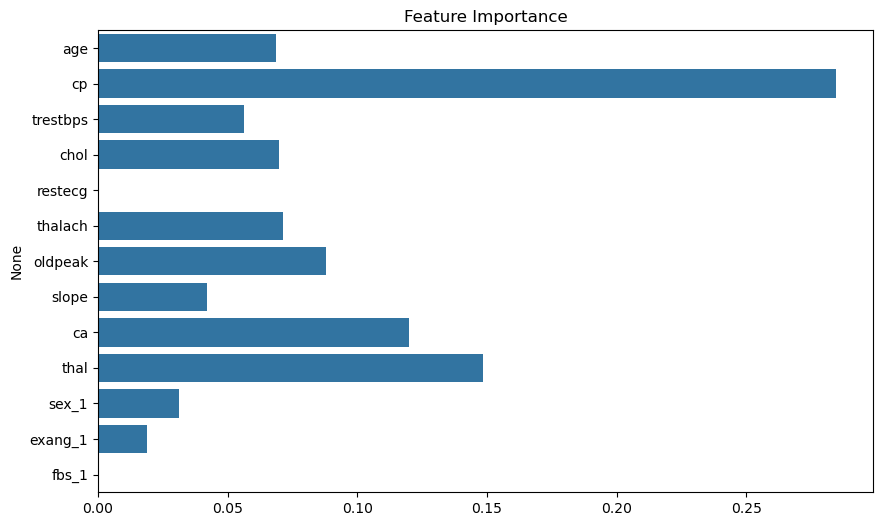

In [15]:
# تحليل أهمية الميزات
feature_importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

In [16]:
# حفظ النموذج
joblib.dump(model, "decision_tree_model.pkl")
print("Model saved as decision_tree_model.pkl")


Model saved as decision_tree_model.pkl
